# Data Exploration and Analyzing using Logistic Regression on Palmer Penguins Dataset

# **Introdution**


 In the realm of data mining, data visualization stands out as an important technique a process for interpreting and presenting complex datasets for reference. Data visualization refers to the visualization and graphical representation of data using a combination of visualization principles. The main goal of data visualization is to transform raw data into a visual format that is easy to understand and communicate. Effective data visualization plays an important role in simplifying complex data, making it accessible not only to data scientists and analysts but also to stakeholders who may lack technical expertise. By providing clear and intuitive visual representations, data visualization helps uncover patterns, trends, and insights that might otherwise remain hidden in tabular or textual data. Exploratory Data Analysis (EDA) is one of the most important both in data mining and data visualization process. The following **CRISP-DM** (Cross-Industry Standard Process for Data Mining) methodology steps are implemented to the Palmer Penguins dataset to achieve a fruitful and undertstandable result.

**Understand the Dataset:** The Palmer Penguins dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. Familiarize yourself with the variables in the dataset.

**Data Cleaning:** Check for missing values and outliers in the dataset. Handle these appropriately to ensure the quality of your analysis.

**Exploratory Data Analysis (EDA):** Start by summarizing the main characteristics of the dataset using statistical measures such as mean, median, mode, and standard deviation. Use visualizations like histograms, box plots, and scatter plots to understand the distribution of the data and the relationships between variables.

**Feature Engineering:** Based on your EDA, create new features that might help in explaining the data better. This could involve creating categorical variables, binning continuous variables, or creating interaction variables.

**Model Building:** Choose a suitable model for your analysis. This could be a regression model if you're trying to predict a continuous outcome or a classification model if you're predicting a categorical outcome.

**Model Evaluation:** Evaluate the performance of your model. This could involve checking the accuracy of your predictions or assessing the quality of your clusters.

**Interpretation:** Interpret your findings. If you found a connection between the features and the target variable, explain this connection in clear and simple terms.

**Presentation:** Present your findings clearly and understandably. Use visualizations to help explain your results, and be sure to discuss the implications of your findings.

# 1. Understanding the Business/Research Problem

The objective of this analysis is to build a predictive model to classify penguin species based on their physical measurements. This aiming to distinguish different species of the penguins.

Questions to ask:
- Which physical characteristics are most indicative of a penguin's species?
- How accurately can we classify penguin species using these characteristics?

# 2. Understanding the Data

**Description of the Dataset:**
The Palmerpenguins is a dataset for data exploration & visualization, as an alternative to iris. Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. Palmer Station Antarctica LTER and K. Gorman. 2020.[[1]](https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e)

The dataset consists of 344 observations and 7 features.
- **species:** penguin species (Chinstrap, Adélie, or Gentoo)

- **culmen_length_mm:** culmen length (mm)
- **culmen_depth_mm:** culmen depth (mm)
- **flipper_length_mm:** flipper length (mm)
- **body_mass_g:** body mass (g)
- **island:** island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- **sex:** penguin sex

## Importing Libraries

In [11]:
# Libraries imports

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib.pyplot as plt # plot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/DMFINAL/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/DMFINAL/input/penguins_lter.csv
/content/drive/MyDrive/Colab Notebooks/DMFINAL/input/penguins_size.csv


In [ ]:
# Custom Color Palletes
my_colors = ['#ea7d23', '#9B59B6', '#5DADE2']

# Plot Color Palletes
sns.palplot(my_colors)

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DMFINAL/input/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [14]:
# Get the shape of the dataset (number of rows, number of columns)
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (344, 7)


In [15]:
df.duplicated().sum()

0

In [16]:
# Checking the unique values of the categorical columns

cat_columns = df.select_dtypes('object').columns.to_list()

for col in cat_columns:
    print(col, ': ', end = '')
    print(df[col].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['MALE' 'FEMALE' nan '.']




```
The column "sex" has null values and data points "." as their gender. Assign "NaN" to it.
Finding where the value is?
```



In [17]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [18]:
# assign "Nan"
df.loc[336, "sex"] = np.nan
print(df.loc[336])

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                     NaN
Name: 336, dtype: object


In [26]:
df.describe(include='all')

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
count,344.000000,342.000000,342.000000,342.000000,342.000000,344,344,344,344,344
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,179,176,176,220,292
mean,0.918605,43.921930,17.151170,200.915205,4201.754386,NaN,NaN,NaN,NaN,NaN
std,0.893320,5.459584,1.974793,14.061714,801.954536,NaN,NaN,NaN,NaN,NaN
min,0.000000,32.100000,13.100000,172.000000,2700.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,39.225000,15.600000,190.000000,3550.000000,NaN,NaN,NaN,NaN,NaN
50%,1.000000,44.450000,17.300000,197.000000,4050.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,48.500000,18.700000,213.000000,4750.000000,NaN,NaN,NaN,NaN,NaN


# 3. Data Preparation/ Cleaning and Preprocessing

 There are missing values on 5 columns. Four columns are numerical and one column is categorical. This can be solved by using **KNNImputer** from **sklearn** to impute missing values. But the KNNIMputer does not work with ‘object’ and string datatypes. So, I here using the method to o first convert it to number. **Source** [[2]](https://machinelearningbrain.website/how-to-handle-missing-data-in-python/#3-advanced-imputation-methods)

In [46]:
                                                # Checking Missing values
# Count missing values for each column
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [47]:
                                                # Variable Encoding
# getting Dummies of categorical features
df = pd.get_dummies(df, columns=["sex","island"])

# Perform Label Encoding on Target variable
LE = LabelEncoder()
df['species'] = LE.fit_transform(df['species'])
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,False,False,True,False,False,True
1,0,39.5,17.4,186.0,3800.0,False,True,False,False,False,True
2,0,40.3,18.0,195.0,3250.0,False,True,False,False,False,True
3,0,NaN,NaN,NaN,NaN,False,False,False,False,False,True
4,0,36.7,19.3,193.0,3450.0,False,True,False,False,False,True


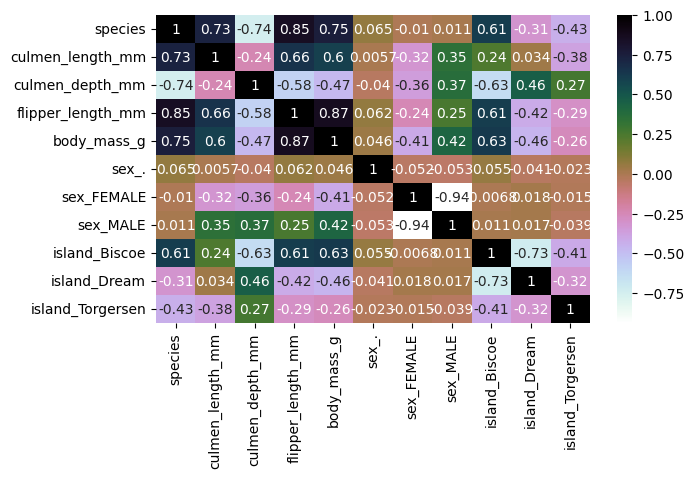

In [48]:
                                                  # Correlation Matrix
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# 4. Exploratory Data Analysis

<ipython-input-38-0d41f1b59d9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= df['species'],


Text(0.5, 0.98, 'Penguin Species (Target) Distribution')

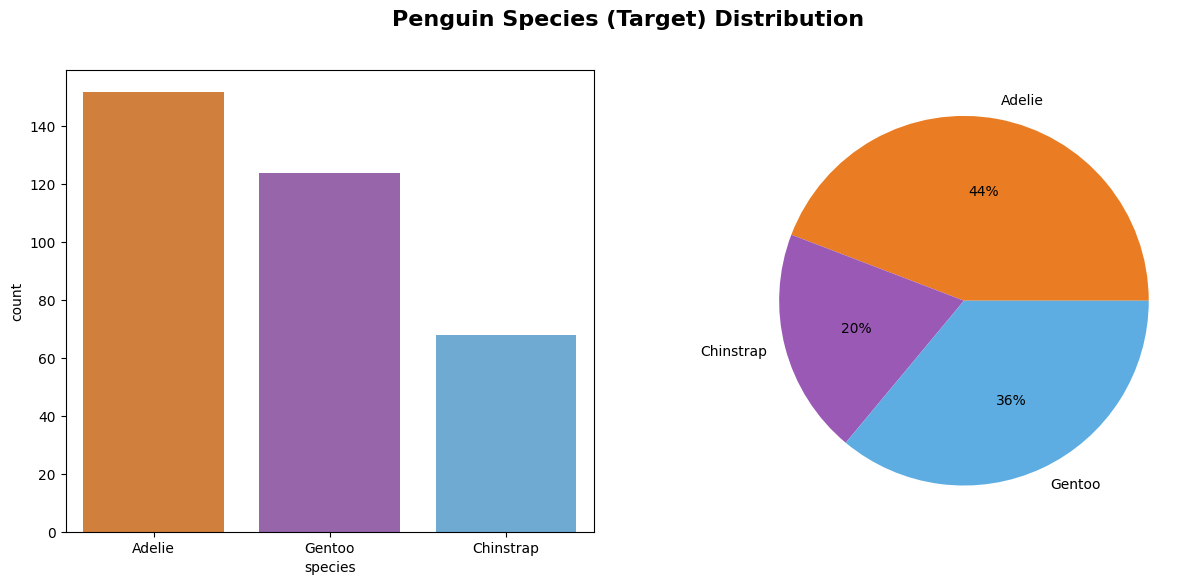

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Countplot
sns.countplot(data=df, x= df['species'],
              # order the bars
              order= df['species'].value_counts().index,
              ax=axes[0],
              palette=my_colors)


# Pie Chart
df.groupby('species').size().plot(kind='pie', colors = my_colors, ax=axes[1], autopct='%.0f%%')

plt.suptitle('Penguin Species (Target) Distribution',
             fontweight = 'heavy', fontsize = 16, fontfamily = 'Helvetica')



```
There is a class imbalance.
The Adelie penguins are the most common in the dataset, followed by Gentoo penguins, and Chinstrap penguins.
```



Text(0.5, 0.98, 'Island Distribution')

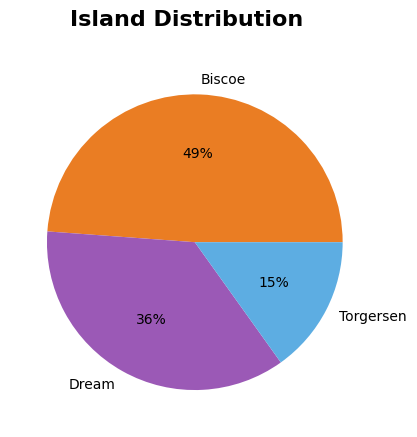

In [39]:
df.groupby('island').size().plot(kind='pie', colors = my_colors, autopct='%.0f%%')
plt.suptitle('Island Distribution',
             fontweight = 'heavy', fontsize = 16, fontfamily = 'Helvetica')

Text(0.5, 0.98, 'Sex Distribution')

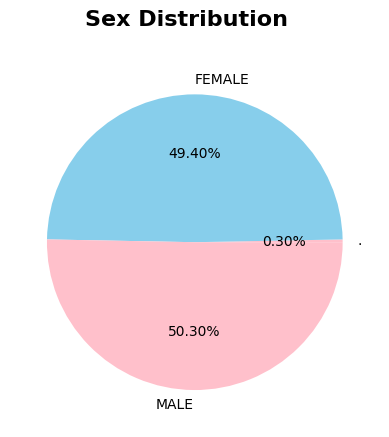

In [40]:
df.groupby('sex').size().plot(kind='pie', colors = ["pink", "skyblue"], autopct='%1.2f%%')
plt.suptitle('Sex Distribution',
             fontweight = 'heavy', fontsize = 16, fontfamily = 'Helvetica')



```
Sex distribution is roughly equal
```



In [31]:
# Separating numerical columns
numerical_features = df.select_dtypes(include=['float64']).columns

Text(0.5, 1.03, 'Pairplot of Numerical Variables')

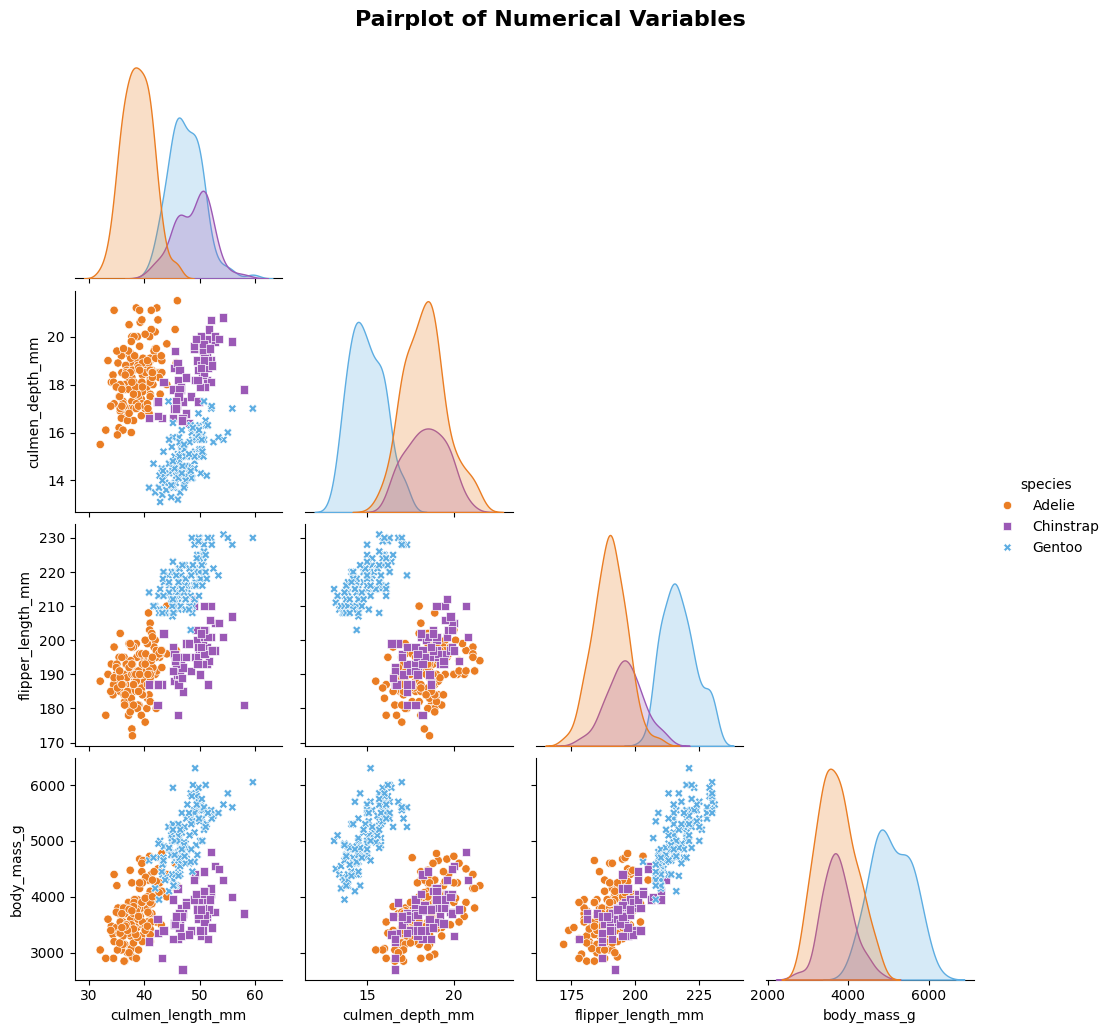

In [41]:
# Create Pairplot
pairplot = sns.pairplot(df, hue = 'species', diag_kind = 'kde', palette = my_colors, markers = ['o', 's', 'X'], vars=numerical_features, corner=True)

pairplot.fig.suptitle('Pairplot of Numerical Variables', fontweight = 'heavy', y = 1.03, fontsize = '16')

**Observations From Plot**
- The species "Gentoo" has longer flippers, more body mass, and small culmen depth.
- We can easily differentiate Gentoo based on culmen_depth_mm vs body_mass_g and culmen_depth_mm vs flipper_length_mm.
- Adelie and Chinstrap have some overlapping based on culmen_depth_mm vs body_mass_g and flipper_length_mm vs body_mass_g.
- Clusters are also easily separable based on culmen_length_mm vs culmen_depth_mm, culmen_length_mm vs flipper_length_mm , culmen_length_mm vs body_mass_g.

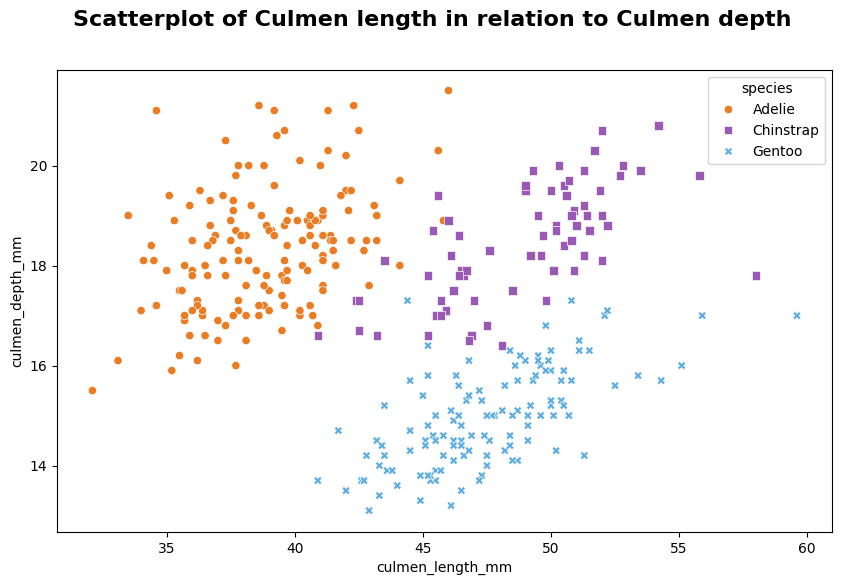

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=df , hue= "species", style = "species", palette = my_colors, markers=['o', 's', 'X'])
plt.suptitle('Scatterplot of Culmen length in relation to Culmen depth', fontweight = 'heavy', fontsize = '16')
plt.show()

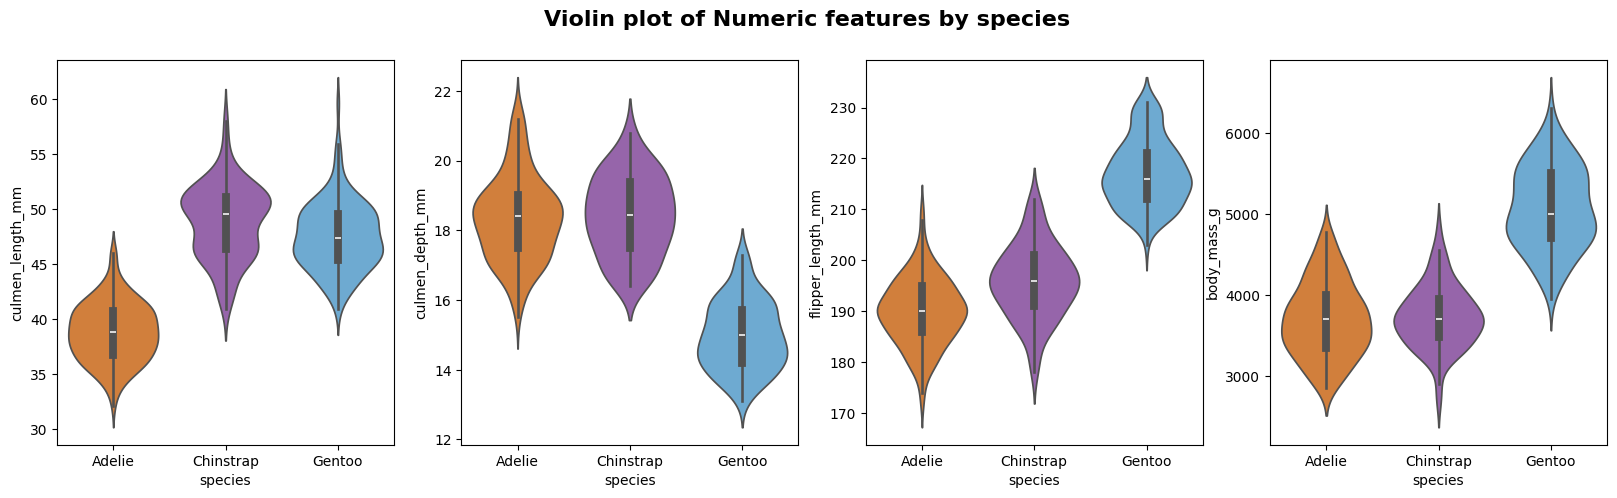

In [43]:
numerical_features = df.select_dtypes(include=['float64']).columns

fig,ax = plt.subplots(1,len(numerical_features), figsize=(20,5))

for i, col in enumerate(numerical_features):
        sns.violinplot(
            ax=ax[i],
            data=df,
            x='species',
            y=col,
            hue='species',
            palette=my_colors,
            )
plt.suptitle('Violin plot of Numeric features by species', fontweight = 'heavy', fontsize = '16')
plt.show()

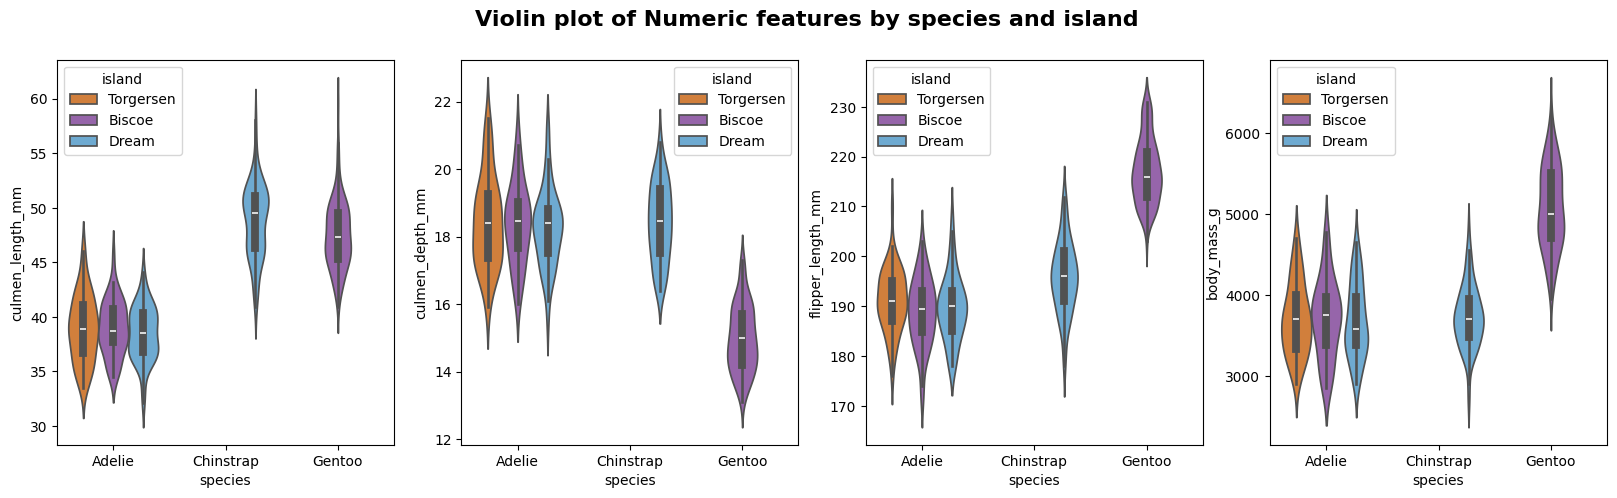

In [44]:
fig,ax = plt.subplots(1,len(numerical_features), figsize=(20,5))

for i, col in enumerate(numerical_features):
        sns.violinplot(
            ax=ax[i],
            data=df,
            x='species',
            y=col,
            hue='island',
            palette=my_colors,
            )
plt.suptitle('Violin plot of Numeric features by species and island', fontweight = 'heavy', fontsize = '16')
plt.show()

<ipython-input-45-09279d7b6525>:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
<ipython-input-45-09279d7b6525>:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
<ipython-input-45-09279d7b6525>:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(
<ipython-input-45-09279d7b6525>:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


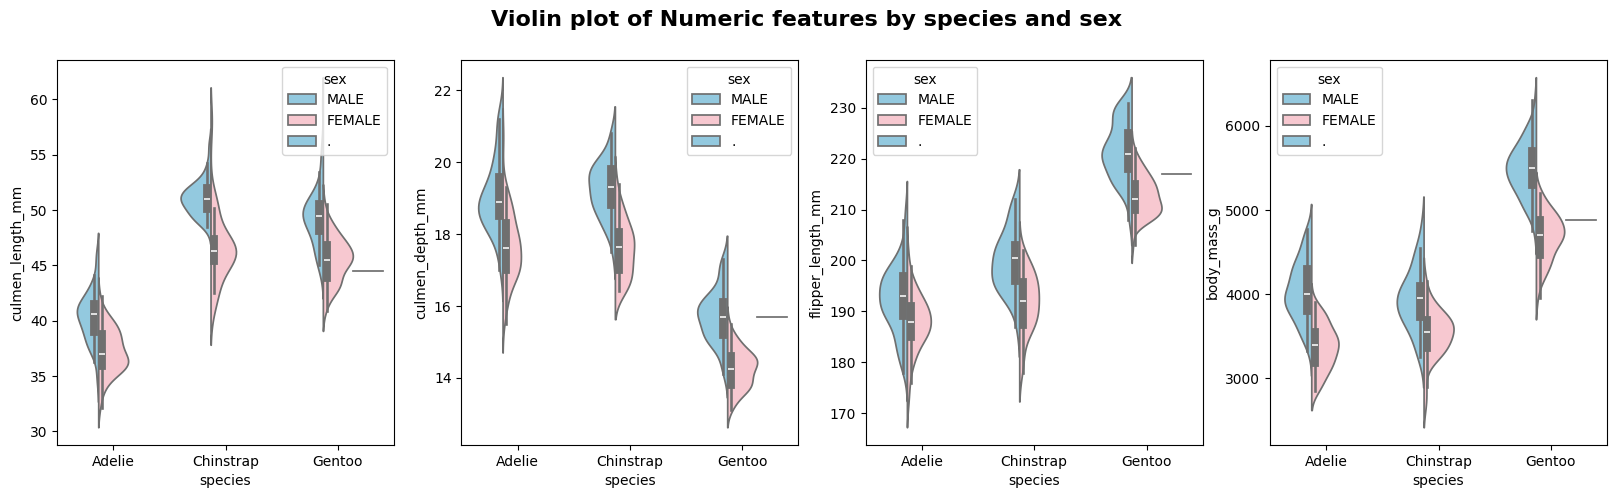

In [45]:
fig,ax = plt.subplots(1,len(numerical_features), figsize=(20,5))

for i, col in enumerate(numerical_features):
        sns.violinplot(
            split=True,
            ax=ax[i],
            data=df,
            x='species',
            y=col,
            hue='sex',
            palette=["skyblue", "pink"],
            )
plt.suptitle('Violin plot of Numeric features by species and sex', fontweight = 'heavy', fontsize = '16')
plt.show()

**Adelie penguins:**

- They are present on all three islands.
- Smaller culmen length, flipper length and low body mass. But have more culmen depth than Gentoo Penguins.
- On Torgerson island, its culmen length, culmen depth and flipper length tend to be slightly more than on other islands.

**Chinstrap penguins:**

- Only found on Dream Island.
- Chinstrap penguins have longer culmen length than Adelie penguins and slighlty longer than Gentoo.longer flipper than Adelie but short.
- Slightly longer flipper than Adelie but shorter flipper than Gentoo.

**Gentoo penguins:**

- Only located on Biscoe Island.
- They are the heaviest.
- They have more body mass than the other species.
- They have longer flippers than the other species.
They have the thinnest culmen (bill).

**Male Penguins vs Female Penguin**

- In all species, males tend to be bigger than females.

# 5. Modeling

Since we are doing **knnimputation**, we first split dataset into train and set test, standardize it and then do imputation.

In [49]:
# Define features and target variable
X = df.drop("species", axis=1)  # Features (all columns except 'species')
y = df["species"]  # Target variable

In [50]:
                                          # Train- Test Split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42, stratify=y)

In [51]:
                                          # Standarization
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [52]:
# Handling missing values using KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_train.iloc[:,:] = knn_imputer.fit_transform(X_train)
X_test.iloc[:,:] = knn_imputer.fit_transform(X_test)

In [53]:
X_test.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex_.                0
sex_FEMALE           0
sex_MALE             0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

## Logistic Regression Model Implementation

In [54]:
# Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred_LogReg = LogReg.predict(X_test)
print('Logistic Regression - ',accuracy_score(y_pred_LogReg, y_test))

Logistic Regression -  0.9855072463768116


# 6. Evaluation

In [55]:
# Print the classification report
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



# 7. Deployment

In [59]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, jsonify

# Initialize the Flask app
app = Flask(__name__)

# Load model components
model = joblib.load('logreg_model.pkl')
scaler = joblib.load('scaler.pkl')
imputer = joblib.load('imputer.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from request
    data = request.json

    # Convert JSON data to DataFrame
    df = pd.DataFrame(data)

    # Scale and impute data
    df_scaled = scaler.transform(df)
    df_imputed = imputer.transform(df_scaled)

    # Make predictions
    predictions = model.predict(df_imputed)

    # Return predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

# References

[1] [Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguin (Pygoscelis antarctica) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 6. Environmental Data Initiative. (Accessed 2024-06-15).]( https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e)

[2]